In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import squarify

%matplotlib inline

In [191]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#D1A72A', '#2D2D2D', '#DDDDC9', '#EB5852', '#CCC614', '#993D3D']),
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 30,
    'axes.grid': True,
    'grid.color': '#2D2D2D',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 4.0,
    'legend.frameon' : False,
    'axes.labelcolor': '#D1A72A',
    'axes.labelsize': 15,
    'font.size': 15,
    'grid.linestyle': '--'
})

In [160]:
df = pd.read_csv('all-sample-tabs.csv')
df.head()

,artist_name,artist_url,date,difficulty,duration,id,part,preset_id,rating,song_name,...,tonality_name,tp_version,tracks,tuning,type,type_name,version,version_description,votes,datetime
0,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1476429796,NaN,NaN,1890096,album,0.0,4.86700,1,...,NaN,0.0,NaN,Standard,Chords,Chords,1.0,Some improvements on other submitted versions.,9,2016-10-14
1,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1158105601,NaN,NaN,412781,album,0.0,4.62626,1967-1970 Disc 1,...,NaN,0.0,NaN,Standard,Tabs,Tab,1.0,NaN,20,2006-09-12
2,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1476436304,NaN,NaN,1890043,album,3233.0,4.72338,A Hard Days Night,...,NaN,0.0,NaN,Standard,Chords,Chords,1.0,Some improvements on other submitted versions.,10,2016-10-14
3,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1088553600,NaN,NaN,124485,album,3233.0,4.57017,A Hard Days Night,...,NaN,0.0,NaN,Standard,Tabs,Tab,1.0,NaN,17,2004-06-29
4,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1225670401,NaN,NaN,750913,album,3233.0,4.14040,A Hard Days Night,...,NaN,0.0,NaN,Standard,Tabs,Tab,2.0,NaN,7,2008-11-02


In [247]:
df.datetime = pd.to_datetime(df.datetime)

In [161]:
df.dtypes

artist_name             object
artist_url              object
date                     int64
difficulty              object
duration                object
id                       int64
part                    object
preset_id              float64
rating                 float64
song_name               object
tab_url                 object
tonality_name           object
tp_version             float64
tracks                  object
tuning                  object
type                    object
type_name               object
version                float64
version_description     object
votes                    int64
datetime                object
dtype: object

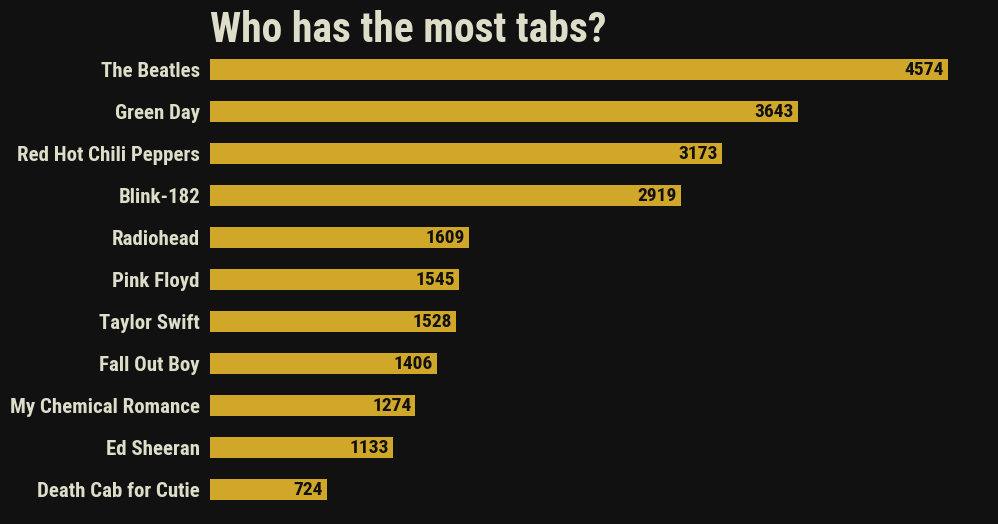

In [255]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df.artist_name.value_counts().sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))

barlabels = ['The Beatles', 'Green Day', 'Red Hot Chili Peppers', 'Blink-182', 'Radiohead', 'Pink Floyd', 'Taylor Swift', 'Fall Out Boy', 'My Chemical Romance', 'Ed Sheeran',  'Death Cab for Cutie']
barlabels = barlabels[::-1]
ax.grid(False)
ax.set_ylabel('')
ax.set_title('Who has the most tabs?', loc='left', fontdict={'color': '#DDDDC9'}, pad=5)
ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[''], fontdict={'color': '#DDDDC9'})

ax.spines['left'].set_color('none')

for i, bar in enumerate(ax.patches):
    # print(i)
    #if i == 10:
     #   value = str(int(round(bar.get_width()))) + " tabs"
    #else:
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - 25
    y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': '#111111', 'size': 14}, fontweight='bold')

#ax.text(0, 11, 'No surprises in this eleven band sample.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

plt.savefig("how-many-tabs.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

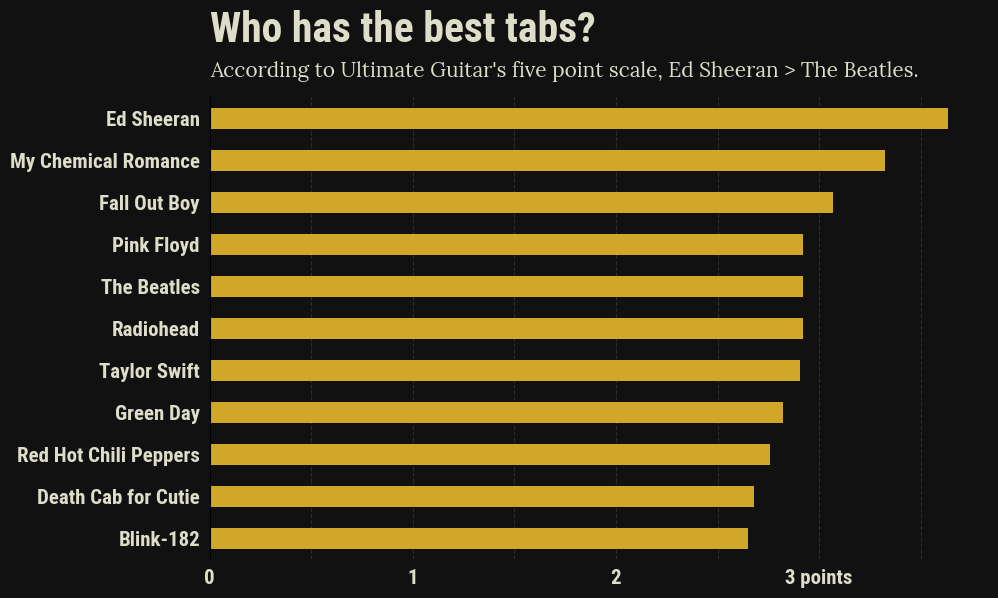

In [197]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df.groupby('artist_name').rating.mean().sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))
barlabels = ['Blink-182', 'Death Cab for Cutie', 'Red Hot Chili Peppers', 'Green Day', 'Taylor Swift', 'Radiohead', 'The Beatles', 'Pink Floyd', 'Fall Out Boy', 'My Chemical Romance', 'Ed Sheeran']
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_title('Who has the best tabs?', loc='left', pad = 40, fontdict={'color': '#DDDDC9'})
ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[0, '', 1, '', 2, '', '3 points'], fontdict={'color': '#DDDDC9'})

ax.text(0, 11, 'According to Ultimate Guitar\'s five point scale, Ed Sheeran > The Beatles.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

plt.savefig("whos-tabs-are-best.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

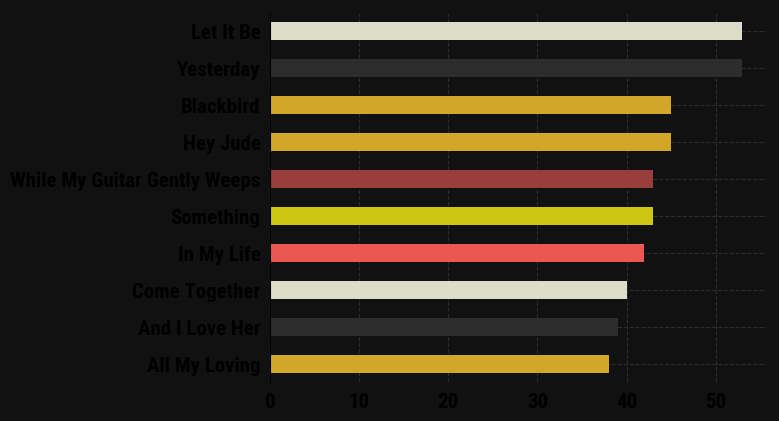

In [273]:
df[df.artist_name == 'The Beatles'].song_name.value_counts().head(10).sort_values().plot(kind='barh')
                                                                            

In [246]:
df.dtypes

artist_name             object
artist_url              object
date                     int64
difficulty              object
duration                object
id                       int64
part                    object
preset_id              float64
rating                 float64
song_name               object
tab_url                 object
tonality_name           object
tp_version             float64
tracks                  object
tuning                  object
type                    object
type_name               object
version                float64
version_description     object
votes                    int64
datetime                object
dtype: object

In [97]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'k',
          'axes.facecolor': '#333333',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [242]:
df_top = pd.read_csv('top_100_rated_tabs_all_time.csv')
df_top.head()

,artist_name,artist_url,date,id,part,preset_id,rating,recording,song_name,status,...,tonality_name,tp_version,type,type_name,verified,version,version_description,votes,hits,datetime
0,Jeff Buckley,https://www.ultimate-guitar.com/artist/jeff_bu...,1121385600,198052,NaN,125,4.87365,"{'is_acoustic': 0, 'tonality_name': '', 'perfo...",Hallelujah,approved,...,Db,0,Chords,Chords,0,2,NaN,23400,24166355,2005-07-14
1,Ed Sheeran,https://www.ultimate-guitar.com/artist/ed_shee...,1488453515,1956589,NaN,18913,4.87170,"{'is_acoustic': 0, 'tonality_name': '', 'perfo...",Perfect,approved,...,Ab,0,Chords,Chords,0,1,NaN,11895,12789550,2017-03-02
2,John Legend,https://www.ultimate-guitar.com/artist/john_le...,1369872001,1248578,NaN,14737,4.83100,"{'is_acoustic': 0, 'tonality_name': '', 'perfo...",All Of Me,approved,...,Em,0,Chords,Chords,0,1,NaN,10868,20392289,2013-05-29
3,Imagine Dragons,https://www.ultimate-guitar.com/artist/imagine...,1343779201,1171909,NaN,2616,4.87188,"{'is_acoustic': 0, 'tonality_name': '', 'perfo...",Radioactive,approved,...,Am,0,Chords,Chords,0,1,NaN,10212,8156384,2012-07-31
4,Led Zeppelin,https://www.ultimate-guitar.com/artist/led_zep...,1004486400,9488,NaN,10935,4.89227,"{'is_acoustic': 0, 'tonality_name': '', 'perfo...",Stairway To Heaven,approved,...,Am,0,Tabs,Tab,0,1,NaN,9829,17892840,2001-10-30


In [298]:
df_top.tonality_name.value_counts().index

Index(['G', 'C', 'Am', 'Em', 'D', 'Bm', 'A', 'Bbm', 'Db', 'F', 'E', 'F#m',
       'Ab', 'Ebm', 'Fm', 'Cm', 'B', 'Eb'],
      dtype='object')

In [379]:
squarecolors = ['#D1A72A', '#2D2D2D', '#DDDDC9', '#EB5852', '#CCC614', '#993D3D']
squarecolors = squarecolors[::-1]
squarecolors

['#993D3D', '#CCC614', '#EB5852', '#DDDDC9', '#2D2D2D', '#D1A72A']

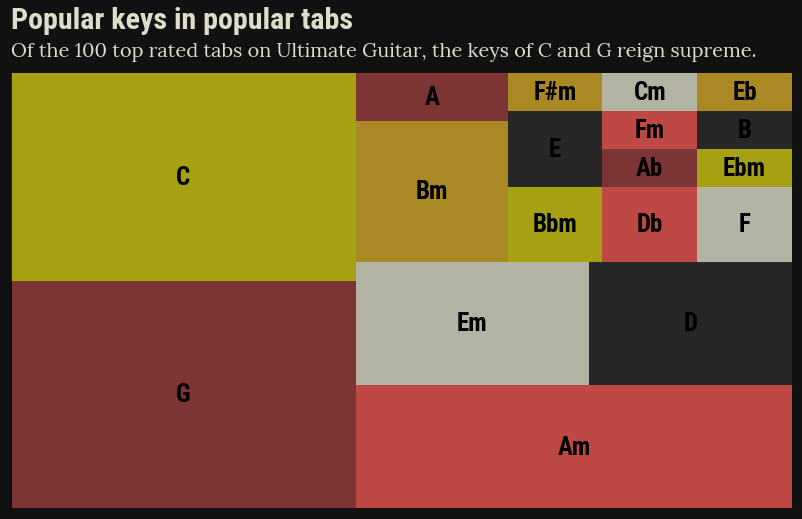

In [380]:
#df_top.tonality_name.value_counts().plot(kind='barh')

plt.rc('font', size=25)

fig, ax = plt.subplots(facecolor='#111111')

fig.set_size_inches(14,8)



ax = squarify.plot(sizes=df_top.tonality_name.value_counts(), label=df_top.tonality_name.value_counts().index, alpha=.8, color=squarecolors)
#plt.axis('off')
#plt.show()

ax.grid(False)
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')


ax.set_title('Popular keys in popular tabs', loc='left', pad=45, fontdict={'color': '#DDDDC9'}, size=30)
ax.text(0,104, 'Of the 100 top rated tabs on Ultimate Guitar, the keys of C and G reign supreme.', fontdict={'color': '#DDDDC9', 'family': 'serif'}, size=20)
plt.savefig("popular-keys.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


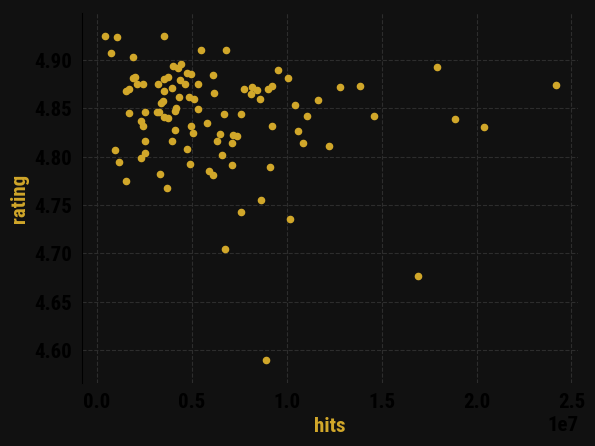

In [275]:
df_top.plot(kind='scatter', x='hits', y='rating')

In [276]:
df_top.datetime = pd.to_datetime(df_top.datetime)

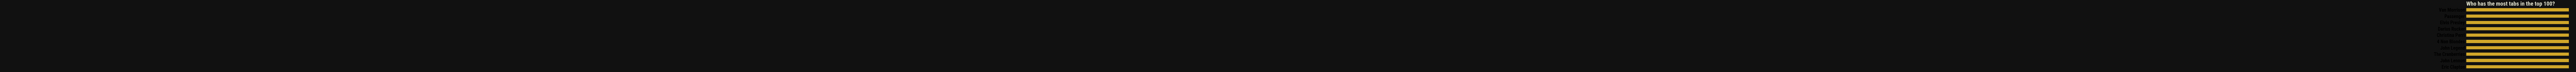

In [382]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df_top.artist_name.value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))

#barlabels = ['The Beatles', 'Green Day', 'Red Hot Chili Peppers', 'Blink-182', 'Radiohead', 'Pink Floyd', 'Taylor Swift', 'Fall Out Boy', 'My Chemical Romance', 'Ed Sheeran',  'Death Cab for Cutie']
#barlabels = barlabels[::-1]
ax.grid(False)
ax.set_ylabel('')
ax.set_title('Who has the most tabs in the top 100?', loc='left', fontdict={'color': '#DDDDC9'}, pad=5)
ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[''], fontdict={'color': '#DDDDC9'})

ax.spines['left'].set_color('none')

for i, bar in enumerate(ax.patches):
    # print(i)
    #if i == 10:
     #   value = str(int(round(bar.get_width()))) + " tabs"
    #else:
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - 25
    y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': '#111111', 'size': 14}, fontweight='bold')

#ax.text(0, 11, 'No surprises in this eleven band sample.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

plt.savefig("how-many-tabs-top-100.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

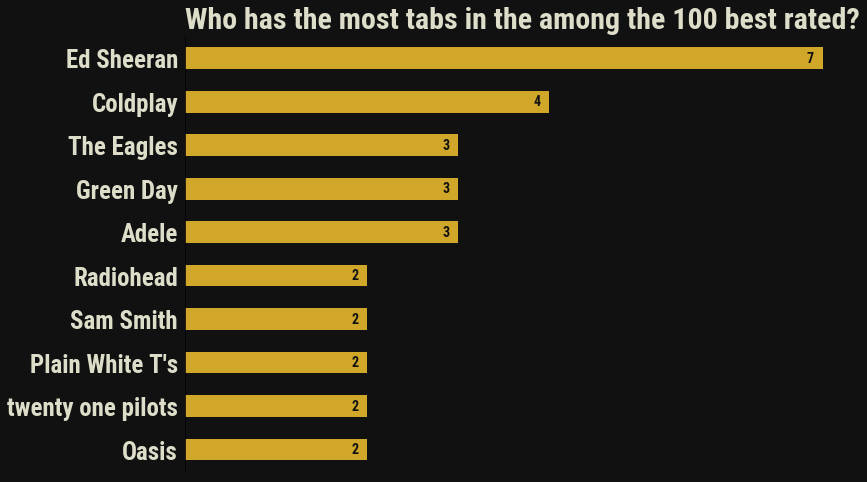

In [401]:
fig, ax = plt.subplots(facecolor='#111111')

df_top.artist_name.value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(12,8))
barlabels = ['Oasis', 'twenty one pilots', 'Plain White T\'s', 'Sam Smith', 'Radiohead', 'Adele', 'Green Day', 'The Eagles', 'Coldplay', 'Ed Sheeran']

ax.set_title('Who has the most tabs in the among the 100 best rated?', loc='left', fontdict={'color': '#DDDDC9'}, pad=8, size=30)
ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[''], fontdict={'color': '#DDDDC9'})

for i, bar in enumerate(ax.patches):
    # print(i)
    #if i == 10:
     #   value = str(int(round(bar.get_width()))) + " tabs"
    #else:
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - .1
    y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': '#111111', 'size': 14}, fontweight='bold')

#ax.text(0, 9.8, 'According to Ultimate Guitar\'s five point scale, Ed Sheeran > The Beatles.', fontdict={'family': 'serif', 'color': '#DDDDC9'})
  
ax.grid(False)
ax.set_ylabel('')
plt.savefig("how-many-tabs-top-100.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')